In [257]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import f


In [258]:
data_tweet = pd.read_csv("vaccination_all_tweets.csv")
data_vac = pd.read_csv("vaccinations.csv")


In [259]:
#data_vac = data_vac.drop_duplicates(subset='daily_vaccinations', keep="last")
#data_vac.groupby('daily_vaccinations', group_keys=False).apply(lambda x: x.loc[x.date.idxmax()])
data_vac = (data_vac.groupby('date')) \
    .agg({'location':'count', 'daily_vaccinations': 'sum'}) \
    .reset_index() \
    .rename(columns={'location':'counties_count'})

In [260]:
data_vac.tail(15)

,date,counties_count,daily_vaccinations
255,2021-08-14,210,149927600.0
256,2021-08-15,209,146754277.0
257,2021-08-16,206,146865385.0
258,2021-08-17,198,147057695.0
259,2021-08-18,195,146166823.0
260,2021-08-19,193,146862864.0
261,2021-08-20,191,145618292.0
262,2021-08-21,183,142912307.0
263,2021-08-22,180,144835334.0
264,2021-08-23,174,140097443.0


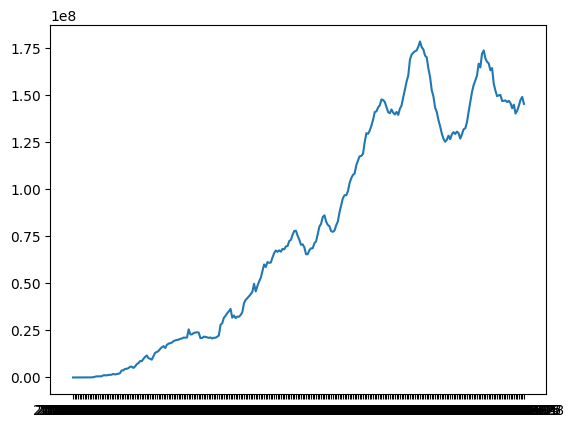

In [261]:
plt.plot(data_vac.date ,data_vac["daily_vaccinations"])

In [262]:
data_tweet.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


In [263]:
data_tweet['date'] = pd.to_datetime(data_tweet['date'], format='%Y-%m-%d %H:%M:%S')

In [264]:
data_tweet = (data_tweet.groupby(data_tweet['date'].dt.date)) \
    .agg({'retweets': 'sum'}) \
    .reset_index()

In [265]:
data_tweet.head()

,date,retweets
0,2020-12-12,545
1,2020-12-13,164
2,2020-12-14,450
3,2020-12-15,200
4,2020-12-16,203


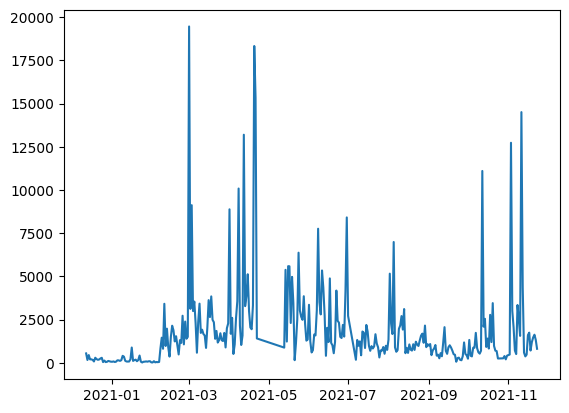

In [266]:
plt.plot(data_tweet["date"], data_tweet["retweets"])

In [267]:
data = pd.DataFrame(data_vac)
data["tweets"] = data_tweet["retweets"]
data.tail(15)

,date,counties_count,daily_vaccinations,tweets
255,2021-08-14,210,149927600.0,888
256,2021-08-15,209,146754277.0,708
257,2021-08-16,206,146865385.0,497
258,2021-08-17,198,147057695.0,468
259,2021-08-18,195,146166823.0,64
260,2021-08-19,193,146862864.0,276
261,2021-08-20,191,145618292.0,301
262,2021-08-21,183,142912307.0,171
263,2021-08-22,180,144835334.0,150
264,2021-08-23,174,140097443.0,389


## Ура, данные готовы

In [268]:
PREDICT_RANGE = 25

In [269]:
def AR(data_v, order, amount):
    kfs = np.ones(order)
    X_mat = []

    X_mat = np.array([data_v[i:order + i] for i in range(len(data_v) - order - 1)])

    kfs = np.linalg.lstsq(X_mat, data_v[order+1:len(data)])
    vect = data_v.values
    for i in range(amount):
        pred = kfs[0]@vect[-order:]
        vect = np.append(vect, pred)
    kmat = np.zeros((len(kfs[0]), len(kfs[0])))
    for i in range(len(kfs[0])):
        kmat[i,i] = kfs[0][i]
    #eigen = np.linalg.eig(kmat)
    # plt.scatter(np.real(kfs[0]), np.imag(kfs[0]))
    # plt.grid()
    return vect

In [270]:
daily_vac = data["daily_vaccinations"]
daily_tweet = data["tweets"]


predict_range = PREDICT_RANGE
lag = len(daily_vac) - predict_range - 2

pred = AR(daily_vac[:int(len(daily_vac)) - predict_range], lag ,predict_range)


C:\Users\Артемка\AppData\Local\Temp\ipykernel_4136\633664581.py:7: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(X_mat, data_v[order+1:len(data)])


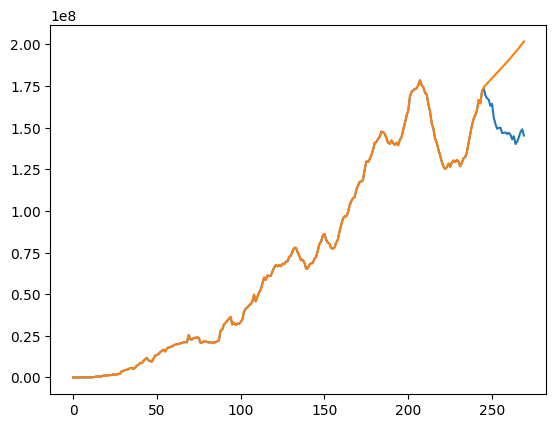

In [271]:
plt.plot(daily_vac.values)
plt.plot(pred)
#plt.plot((daily_vac.values[:len(pred)] - pred)**2)
#plt.ylim([0,2])

In [272]:
def co_AR(X, Y, order_x, order_y, amount):
    kfs = np.ones(order_x + order_y)
    
    # Создание лагированных временных рядов
    X_lagged = np.array([X[i:order_x + i] for i in range(len(X) - order_x - 1)])
    Y_lagged = np.array([Y[i:order_y + i] for i in range(len(Y) - order_y - 1)])

    # Формирование матрицы для теста
    XY_matrix = np.column_stack((X_lagged, Y_lagged))

    kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])
    vect_X = X.values
    vect_Y = Y.values
    for i in range(amount):
        pred = kfs[0]@ np.concatenate((vect_X[-order_x:], vect_Y[- order_y:]))
        vect_X = np.append(vect_X, pred)
    kmat = np.zeros((len(kfs[0]), len(kfs[0])))
    for i in range(len(kfs[0])):
        kmat[i,i] = kfs[0][i]
    #eigen = np.linalg.eig(kmat)
    return vect_X

In [273]:
daily_vac = data["daily_vaccinations"]
daily_tweet = data["tweets"]

predict_range = PREDICT_RANGE
lag = len(daily_vac) - predict_range - 2
pred_lag = co_AR(daily_vac[:int(len(daily_vac)) - predict_range], \
    daily_tweet[:int(len(daily_vac)) - predict_range], \
    lag, lag, predict_range)


C:\Users\Артемка\AppData\Local\Temp\ipykernel_4136\2355781088.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])


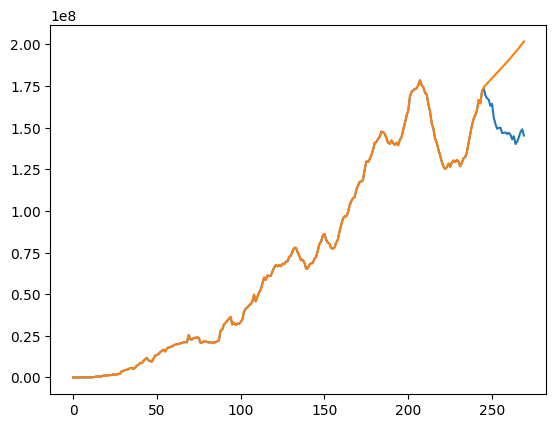

In [274]:
plt.plot(daily_vac.values)
plt.plot(pred)

In [275]:
def calculate_f_statistic(y_with_lag, y_without_lag, p, q, n):
    """
    Расчет F-статистики для теста Грейнджера.

    Параметры:
    - y_with_lag: остатки модели с лагами
    - y_without_lag: остатки модели без лагов
    - p: количество лагированных значений, включенных в модель
    - q: количество коэффициентов регрессии
    - n: количество наблюдений в выборке

    Возвращает:
    - f_statistic: значение F-статистики
    - p_value: p-значение F-теста
    """

    mse_with_lag = np.mean(y_with_lag ** 2)
    mse_without_lag = np.mean(y_without_lag ** 2)

    f_statistic = ((mse_without_lag - mse_with_lag) / p) / (mse_with_lag / (n - p - q))
    p_value = f.sf(f_statistic, p, n - p - q)

    return f_statistic, p_value

n  = len(pred_lag)
f_statistic, p_value = calculate_f_statistic(pred_lag, pred, lag, 2, len(pred_lag))
print(f"F-Statistic: {f_statistic}, P-value: {p_value}")
critical=f.ppf(.95, 2, n - 3)#regression and residual deg of freedom
print('\nThe F-test critical p-value for a 95% significance level\nwith {:} and {:} degrees of freedom is {:.2f}'.format(
    2, n-3,critical))
print('\nsince {:.10f} < {:.2f}, the critical p-value, we can\'t reject the hyp. that\nthe lag members of Y is not belongs to X regression'.format(
f_statistic,critical))

F-Statistic: 5.02190702265794e-11, P-value: 0.9999999999999999

The F-test critical p-value for a 95% significance level
with 2 and 267 degrees of freedom is 3.03

since 0.0000000001 < 3.03, the critical p-value, we can't reject the hyp. that
the lag members of Y is not belongs to X regression


In [276]:
daily_vac = data["daily_vaccinations"]

predict_range = PREDICT_RANGE
lag = len(daily_vac) - predict_range - 2

daily_tweet = data["tweets"]
pred_lag = co_AR(daily_tweet[:int(len(daily_vac)) - predict_range], \
    daily_vac[:int(len(daily_vac)) - predict_range], \
    lag, lag, predict_range)

C:\Users\Артемка\AppData\Local\Temp\ipykernel_4136\2355781088.py:11: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  kfs = np.linalg.lstsq(XY_matrix, X[order_x+1:len(X)])


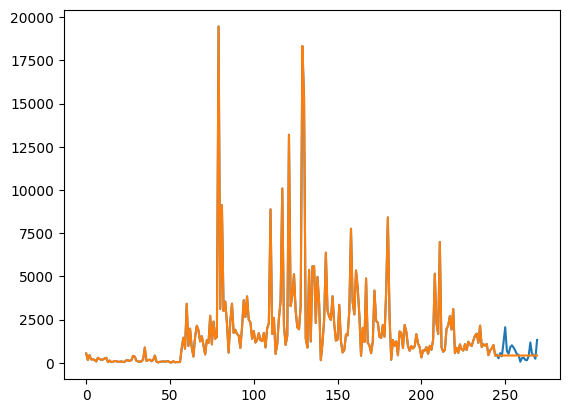

In [277]:
plt.plot(daily_tweet.values)
plt.plot(pred_lag)

In [278]:
n  = len(pred)
f_statistic, p_value = calculate_f_statistic(pred, pred_lag, lag, 2, len(pred))
print(f"F-Statistic: {f_statistic}, P-value: {p_value}")
critical=f.ppf(.95, 2, n - 3)#regression and residual deg of freedom
print('\nThe F-test critical p-value for a 95% significance level\nwith {:} and {:} degrees of freedom is {:.2f}'.format(
    2, n-3,critical))
print('\nsince {:.2f} < {:.2f}, the critical p-value, we can\'t reject the hyp. that\nthe lag members of Y is not belongs to X regression.'.format(
f_statistic,critical))

F-Statistic: -0.10288065834831071, P-value: 1.0

The F-test critical p-value for a 95% significance level
with 2 and 267 degrees of freedom is 3.03

since -0.10 < 3.03, the critical p-value, we can't reject the hyp. that
the lag members of Y is not belongs to X regression.


In [284]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

X = daily_vac.values
Y = daily_tweet.values

# Подготовка данных в формате (Y, X) для теста Грейнджера
data = np.column_stack((X, Y))

# Проведение теста Грейнджера
max_lag = PREDICT_RANGE  # Максимальное количество лагированных значений
test_result = grangercausalitytests(data, max_lag, verbose=True)

# Интерпретация результатов
for lag in range(1, max_lag + 1):
    print(f"Results for lag {lag}:")
    p_value = test_result[lag][0]['ssr_ftest'][1]
    is_causal = p_value < 0.05
    print(f"P-value: {p_value}, Is causal: {is_causal}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0115  , p=0.9146  , df_denom=266, df_num=1
ssr based chi2 test:   chi2=0.0116  , p=0.9141  , df=1
likelihood ratio test: chi2=0.0116  , p=0.9141  , df=1
parameter F test:         F=0.0115  , p=0.9146  , df_denom=266, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1.5920  , p=0.2055  , df_denom=263, df_num=2
ssr based chi2 test:   chi2=3.2445  , p=0.1975  , df=2
likelihood ratio test: chi2=3.2250  , p=0.1994  , df=2
parameter F test:         F=1.5920  , p=0.2055  , df_denom=263, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.0111  , p=0.3883  , df_denom=260, df_num=3
ssr based chi2 test:   chi2=3.1151  , p=0.3742  , df=3
likelihood ratio test: chi2=3.0971  , p=0.3769  , df=3
parameter F test:         F=1.0111  , p=0.3883  , df_denom=260, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.8508  , p=0.4942  

c:\Users\Артемка\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\stattools.py:1545: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


In [285]:
print(f"Results for lag {PREDICT_RANGE}:")
p_value = test_result[PREDICT_RANGE][0]['ssr_ftest'][1]
is_causal = p_value < 0.05  
print(f"P-value: {p_value}, Is causal: {is_causal}")

Results for lag 25:
P-value: 0.9076503813177597, Is causal: False


In [286]:
# Подготовка данных в формате (Y, X) для теста Грейнджера
data = np.column_stack((Y, X))

# Проведение теста Грейнджера
max_lag = PREDICT_RANGE  # Максимальное количество лагированных значений
test_result = grangercausalitytests(data, max_lag, verbose=True)

# Интерпретация результатов
for lag in range(1, max_lag + 1):
    print(f"Results for lag {lag}:")
    p_value = test_result[lag][0]['ssr_ftest'][1]
    is_causal = p_value < 0.05
    print(f"P-value: {p_value}, Is causal: {is_causal}")


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.0632  , p=0.8017  , df_denom=266, df_num=1
ssr based chi2 test:   chi2=0.0639  , p=0.8004  , df=1
likelihood ratio test: chi2=0.0639  , p=0.8004  , df=1
parameter F test:         F=0.0632  , p=0.8017  , df_denom=266, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=0.2146  , p=0.8070  , df_denom=263, df_num=2
ssr based chi2 test:   chi2=0.4373  , p=0.8036  , df=2
likelihood ratio test: chi2=0.4370  , p=0.8037  , df=2
parameter F test:         F=0.2146  , p=0.8070  , df_denom=263, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2984  , p=0.8265  , df_denom=260, df_num=3
ssr based chi2 test:   chi2=0.9194  , p=0.8207  , df=3
likelihood ratio test: chi2=0.9178  , p=0.8211  , df=3
parameter F test:         F=0.2984  , p=0.8265  , df_denom=260, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=0.7514  , p=0.5579  

In [288]:
print(f"Results for lag {PREDICT_RANGE}:")
p_value = test_result[PREDICT_RANGE][0]['ssr_ftest'][1]
is_causal = p_value < 0.05  
print(f"P-value: {p_value}, Is causal: {is_causal}")

Results for lag 25:
P-value: 0.7063701815674519, Is causal: False


## Выводы

Согласно результатам выполненного исследования Грейнджера, нельзя утверждать, что имеется прямая причинно-следственная связь между количеством проведенных вакцинаций против COVID-19 и числом твитов, связанных с вакцинацией.